In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import os
import torch.nn as nn
import torch.nn.functional as F
import math
import time
import pickle

from IPython.display import clear_output
%matplotlib inline


In [ ]:
os.chdir('/home/ct2243/Desktop/RESEARCH_ML/HubLayer/experiments')

PATH = os.getcwd()

os.listdir()

In [87]:
PATH

'/home/ct2243/Desktop/RESEARCH_ML/HubLayer/experiments'

In [88]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    torch.set_default_tensor_type(torch.DoubleTensor)
else:
    device = torch.device('cpu')
    torch.set_default_tensor_type(torch.DoubleTensor)
print(device)

cuda


In [89]:
model_name = 'first_model'

In [90]:
loss = np.load(PATH+'/' + model_name +'/loss.npy')
checkpoint = torch.load(PATH+'/'+model_name+'/model_state')
epochs_trained = checkpoint['epochs_trained']

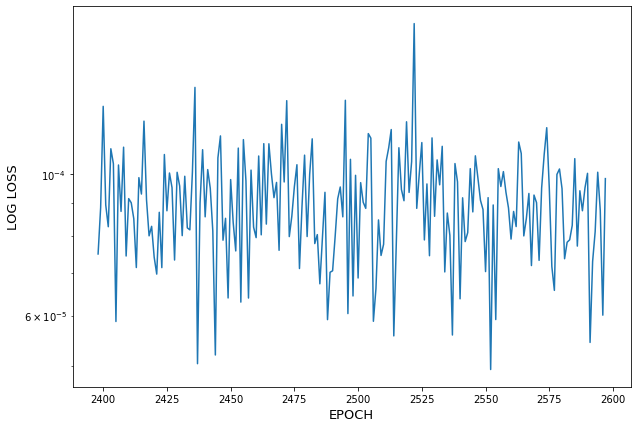

In [91]:
plt.figure(figsize = (10,7))
plt.ylabel('LOG LOSS', fontsize = 13)
plt.xlabel('EPOCH', fontsize = 13)

plt.semilogy(np.arange(len(loss))+epochs_trained, loss)

In [92]:
class PendulumNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(PendulumNet, self).__init__()
        self.input = nn.Linear(D_in, H)
        self.fc1 = nn.Linear(H, H)
        self.fc2 = nn.Linear(H, H)
        self.out = nn.Linear(H, D_out)

    def forward(self, X):
        X = torch.sin(self.input(X))
        X = torch.sin(self.fc1(X))
        X = torch.sin(self.fc2(X))
        X = self.out(X)
        return X
    
def random_uniform_phase_space(thetamax, pmax, numOfParticles):
    thetais = np.random.uniform(-thetamax, thetamax, numOfParticles)
    ps = np.random.uniform(-pmax,pmax, numOfParticles)
    return thetais, ps


In [93]:
args = pickle.load( open( PATH + '/' + model_name + "/args.p", "rb" ) )

model = PendulumNet(3, args.neurons_per_layer, 2)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device = device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr = args.learning_rate, weight_decay = 2e-6)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])



In [84]:
optimizer.state_dict()

{'state': {140133397052584: {'step': 22400,
   'exp_avg': tensor([[-1.7701e-08, -7.6967e-06,  9.0855e-07],
           [ 3.4649e-08,  1.5489e-05, -1.3559e-06],
           [ 1.0305e-07,  4.0916e-05, -2.0220e-06],
           [-1.2291e-07, -1.5993e-05,  6.6703e-06],
           [-9.8092e-09,  5.8423e-05, -3.8702e-06],
           [ 6.0355e-09,  1.9129e-06, -2.6280e-07],
           [-1.6070e-07, -2.1880e-06,  4.1263e-06],
           [ 1.6953e-08,  5.8582e-06, -9.6782e-07],
           [ 2.2429e-08,  7.7550e-06,  3.8665e-07],
           [-3.6334e-08, -1.1189e-05,  1.2485e-06],
           [-1.9183e-08, -8.1673e-06,  4.7838e-07],
           [ 1.1402e-07,  4.2084e-05, -3.8423e-06],
           [-6.9483e-08, -4.9073e-05,  5.6588e-06],
           [-5.4699e-08, -1.8196e-05,  2.8085e-07],
           [ 2.9237e-09, -8.6978e-07,  6.1845e-07],
           [ 2.9450e-07,  2.3047e-05,  2.9590e-06],
           [ 2.9507e-09,  1.8989e-06, -1.4727e-08],
           [-3.5349e-07,  3.6861e-05,  8.1340e-06],
         

In [46]:
n_train = args.num_of_particles * args.num_of_samples_per_particles

np.random.seed(0)

tt = np.random.uniform(0, args.time, n_train)
tt = torch.Tensor(tt.reshape(-1,1)).to(device=device)

thetamax = np.pi/2.1
pmax = 4.

theta0, p0 = random_uniform_phase_space(thetamax, pmax, args.num_of_particles)
theta0, p0 = np.repeat(theta0, args.num_of_samples_per_particles), np.repeat(p0, args.num_of_samples_per_particles)
theta0, p0 = torch.Tensor(theta0.reshape(-1,1)).to(device=device), torch.Tensor(p0.reshape(-1,1)).to(device=device)

X = torch.cat((theta0,p0,tt),dim=1).to(device=device)

theta = theta0 + model(X)[:,0].clone().reshape(-1,1) * tt
p = p0 + model(X)[:,1].clone().reshape(-1,1) * tt

In [52]:
theta_ = theta.cpu().detach().numpy()

array([[-1.47697663],
       [-1.82058416],
       [-1.58572379],
       ...,
       [-2.0603681 ],
       [-1.55753272],
       [-1.51189171]])